In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import torch.nn.functional as F
import torch
from torch import optim
import torch
import torch.nn as nn

# Importing and visualizing dataset

In [2]:
#import the dataset
iris = pd.read_csv("creditcard.csv")
iris.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Seperating Examples and Labels

In [3]:
X= iris.iloc[:, 1:29]
Y= iris.iloc[:, 30]
from sklearn.preprocessing import normalize
X = normalize(X)
y = np.array(Y)
y = y.astype(int)

X_train,X_test,Y_train,Y_test= train_test_split(X, y, test_size= 0.10, random_state= 1)
print ('X_train shape: ',X_train.shape)
print ('y_train shape: ',Y_train.shape)
print ('X_test shape: ',X_test.shape)
print ('y_test shape: ',Y_test.shape)

X_train shape:  (256326, 28)
y_train shape:  (256326,)
X_test shape:  (28481, 28)
y_test shape:  (28481,)


## Using Dataloader to convert numpy arrays to Tensors 

In [4]:

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)),
                         batch_size=len(X_train), shuffle=True)
testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)),
                         batch_size=len(X_test), shuffle=False)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

## This class will define our model
### Using __init__ we will define numbers of nodes in our particular layer
### Using forward() we will define functionality of each layer

In [5]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28, 340)
        self.fc2 = nn.Linear(340, 220)
        self.fc3 = nn.Linear(220, 200)
        self.fc4 = nn.Linear(200, 70)
        self.fc5 = nn.Linear(70, 10)
        self.fc6 = nn.Linear(10, 2)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        #x = x.view(x.shape[0], -1)
        #print(x)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.relu(self.fc4(x))
        x = self.dropout(F.relu(self.fc5(x)))
        x = F.log_softmax(self.fc6(x), dim=1)
        
        #x = F.log_softmax(self.fc4(x))
        return x

## Model declaration, Type of loss and optimizer.
### We are using adam optimizer to optimize our network

In [6]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## This block is showing summary off our model

In [9]:
model

Classifier(
  (fc1): Linear(in_features=28, out_features=340, bias=True)
  (fc2): Linear(in_features=340, out_features=220, bias=True)
  (fc3): Linear(in_features=220, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=70, bias=True)
  (fc5): Linear(in_features=70, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.2)
)

## This function is predicting output of examples we will feed in.
### Will be useful in  calculating model accuracies.

In [7]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis= 1)

# Here we will perform forward and backward propagation.

In [11]:
from torch.autograd import Variable

loss1=[]
train_acc=[]

Epoch=40

for epoch in range(Epoch):
    print('------------------------------------------------------------------------------------------')
    acc=0
    train_acc1=0
    
    for i, (features, labels) in enumerate(trainloader):
        #print(features.shape)

        features = Variable(features)

        labels = Variable(labels)

        

        optimizer.zero_grad()

        features=features.float()

        outputs = model(features)

        

        loss = criterion(outputs, labels.long())

        loss.backward()

        optimizer.step()

        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
#             train_acc1=train_accuracy/len(trainloader)

            train_acc1=acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)

            print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 40, i+1, loss.data, train_acc1 ))


------------------------------------------------------------------------------------------
Epoch [1/40], Iter [1] Loss: 0.7079 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [2/40], Iter [1] Loss: 0.6593 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [3/40], Iter [1] Loss: 0.5594 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [4/40], Iter [1] Loss: 0.3087 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [5/40], Iter [1] Loss: 0.0671 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [6/40], Iter [1] Loss: 0.0211 Training Accuracy: 0.99827
----------------------------------------------------------------------------

KeyboardInterrupt: 

## we will plot our accuracies and loss functions below.

In [28]:
np_loss=loss1[0].numpy()
for i in range(len(loss1)):
    np_loss=np.append(np_loss, loss1[i])
np_acc=0.02
for i in range(len(train_acc)):
    np_acc=np.append(np_acc, train_acc[i])

# Training Accuracy
    
    

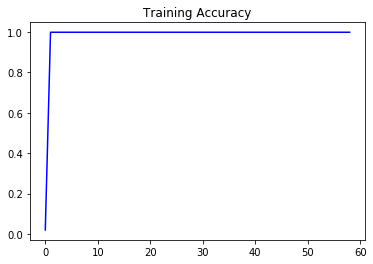

In [19]:
%matplotlib inline
plt.plot(np_acc, color='blue')
plt.title("Training Accuracy")
plt.show()

# Training Loss

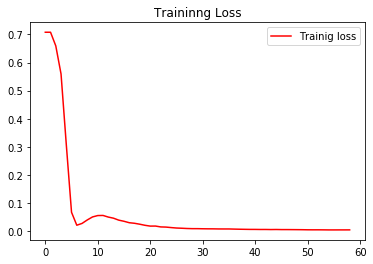

In [20]:
%matplotlib inline
plt.plot(np_loss, color='red', label='Trainig loss')
plt.title("Traininng Loss")
plt.legend()
plt.show()

# Training loss and accuracy curves

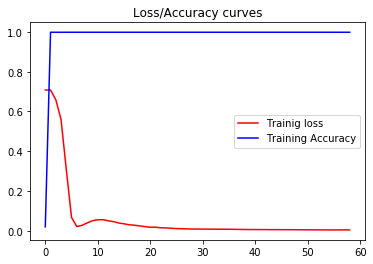

In [21]:
%matplotlib inline
plt.plot(np_loss, color='red', label='Trainig loss')
plt.plot(np_acc, color='blue', label='Training Accuracy')
plt.title("Loss/Accuracy curves")
plt.legend()
plt.show()

# Model test accuracy

In [29]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.9982795547909132


# Precision/ Recall / F1 Scores using sklearn

In [30]:
from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1']
print(classification_report(Y_test, Ypred, target_names=target_names))

C:\Users\wajhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     28432
     Class 1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481

